In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
datadir = './data'

Populating the interactive namespace from numpy and matplotlib


# Plotting Subway Delay and Ridership Information
This notebook plots the relationship between ridership and subway delays on a per station basis for 2015.

## First, create a filter to only use Yonge-University-Spadina and Bloor-Danforth Stations

These are the two most used lines.

In [2]:
yus = ['downsview','wilson','yorkdale','lawrence west','glencairn','eglinton west','st clair west','dupont','spadina','st george','museum',"queen's park",'st patrick','osgoode','st andrew','union','king','queen','dundas','college','wellesley','bloor','rosedale','summerhill','st clair','davisville','eglinton','lawrence','york mills','sheppard','north york centre','finch']
bd = ['kipling','islington','royal york','old mill','jane','runnymede','high park','keele','dundas west','lansdowne','dufferin','ossington','christie','bathurst','spadina','st george','bay','yonge','sherbourne','castle frank','broadview','chester','pape','donlands','greenwood','coxwell','woodbine','main street','victoria park','warden','kennedy']
danger = ['st clair','lawrence','queen','dundas']
danger_corresp = ['st clair west','lawerence west',"queen's park",'dundas west']
interchange = ['spadina','st george','bloor','yonge'] # bloor-yonge is just one interchange, but it has different names on each line

## Import Ridership Information

In [3]:
ridership = np.loadtxt('{0}/ridership_2015.csv'.format(datadir),delimiter=',',skiprows=3,dtype=str)
riderstation = ridership[:,1]
totalriders = ridership[:,4].astype(float)

yus_riders = np.zeros(len(yus))
for station in yus:

    if station not in interchange and station not in danger:
        match = [i for i in range(len(totalriders)) if station in riderstation[i].lower().replace('.','')]
        yus_riders[yus.index(station)] = totalriders[match[0]]
    if station not in interchange and station in danger:
        match = [i for i in range(len(totalriders)) if ((station in riderstation[i].lower().replace('.','')) & (danger_corresp[danger.index(station)] not in riderstation[i].lower().replace('.','')))]
        yus_riders[yus.index(station)] = totalriders[match[0]]
    if station in interchange:
        match = [i for i in range(len(totalriders)) if ((station in riderstation[i].lower().replace('.','')) & ('YU' in riderstation[i]))]
        yus_riders[yus.index(station)] = totalriders[match[0]]
 
bd_riders = np.zeros(len(bd))
for station in bd:

    if station not in interchange and station not in danger:
        match = [i for i in range(len(totalriders)) if station in riderstation[i].lower().replace('.','')]
        bd_riders[bd.index(station)] = totalriders[match[0]]
    if station not in interchange and station in danger:
        match = [i for i in range(len(totalriders)) if ((station in riderstation[i].lower().replace('.','')) & (danger_corresp[danger.index(station)] not in riderstation[i].lower().replace('.','')))]
        bd_riders[bd.index(station)] = totalriders[match[0]]
    if station in interchange:
        match = [i for i in range(len(totalriders)) if ((station in riderstation[i].lower().replace('.','')) & ('BD' in riderstation[i]))]
        bd_riders[bd.index(station)] = totalriders[match[0]]

## Import Delay Code Information

In [4]:
delayinfo = np.loadtxt('{0}/delay_codes_2014-2017.csv'.format(datadir),delimiter=',',skiprows=1,dtype='str')

# Columns-> 0:date, 1:time, 2:day, 3:location, 4:code, 5:delay time, 6:train gap time, 7:train direction, 8:line, 9:vehicle number

# Mask for known codes and only the YUS and BD lines
mask = (delayinfo[:,8]!='SRT') & (delayinfo[:,9]!='SHP') & (delayinfo[:,4]!='XXXXX') & (delayinfo[:,4]!='XXXXXX')
delayinfo=delayinfo[mask]

In [5]:
import pandas
from collections import Counter
code_counts = Counter(delayinfo[:,4])
code_interp = dict(np.loadtxt('data/subway_log_codes',dtype='str',delimiter=','))
df = pandas.DataFrame.from_dict(code_counts, orient='index')
df.columns=['number of delays']
df['description'] = pandas.Series(code_interp)
df['normalized number'] = df['number of delays']/np.sum(df['number of delays'])

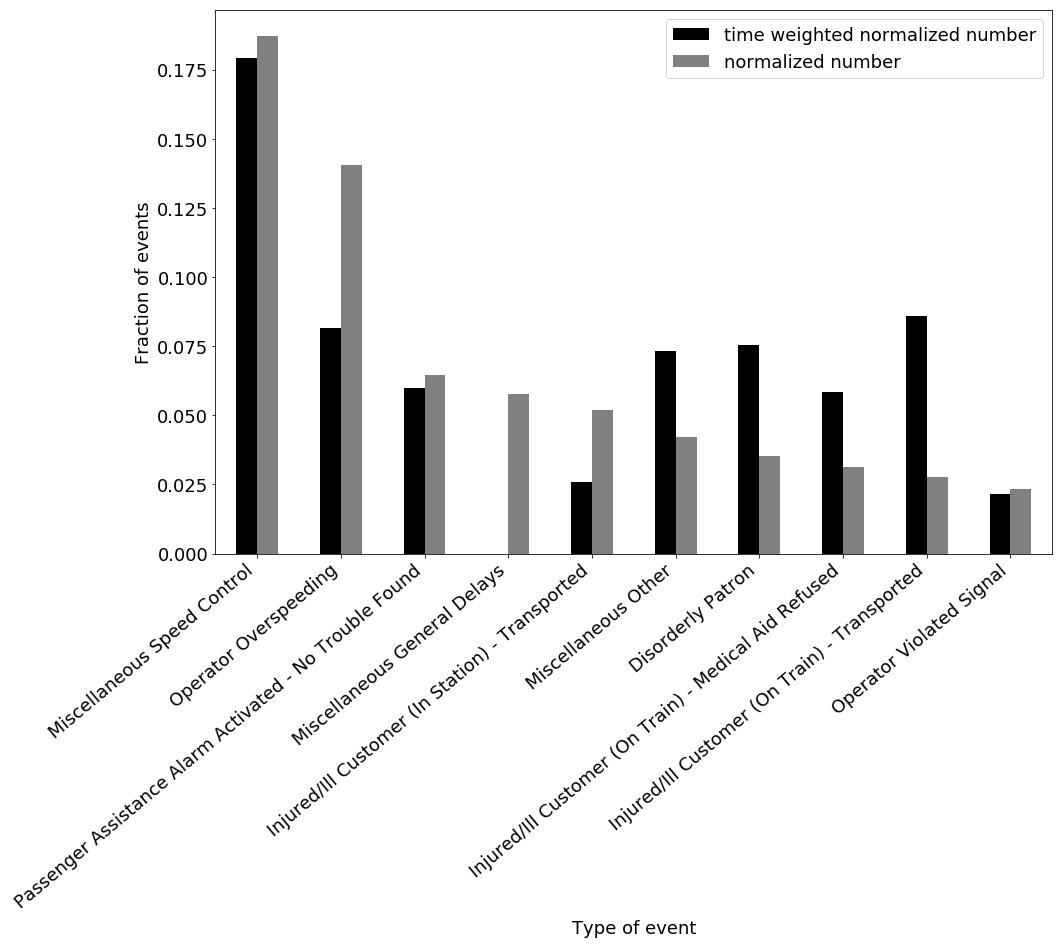

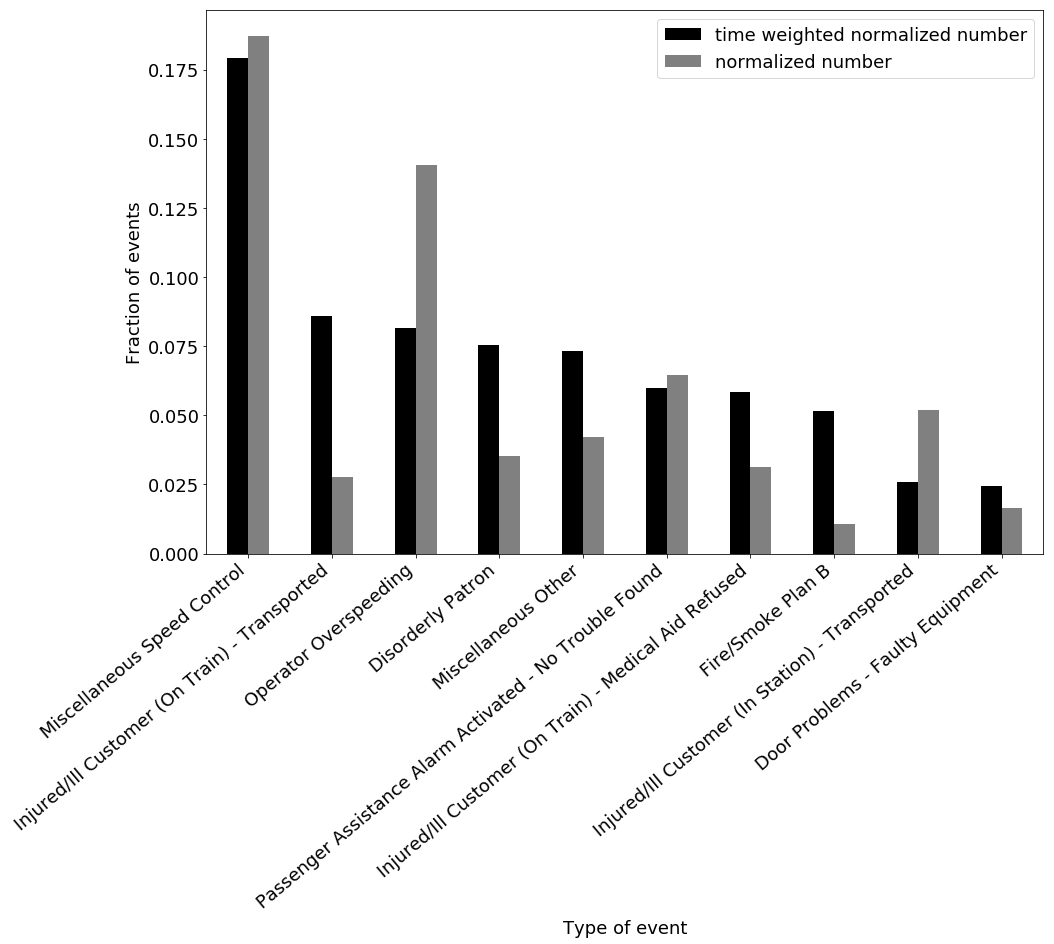

In [9]:
import copy
weighted_code_counts = copy.deepcopy(code_counts)
keys = list(code_counts.keys())
for k in range(len(keys)):
    match = np.where(delayinfo[:,4]==keys[k])
    delaytime = delayinfo[:,5][match]
    weight = np.sqrt(np.sum(delaytime.astype(float)**2)/np.sum(delayinfo[:,5].astype(float)**2))
    weighted_code_counts[keys[k]] = weighted_code_counts[keys[k]]*weight
df['time weighted number'] = pandas.Series(weighted_code_counts)
df['time weighted normalized number'] = df['time weighted normalized number']/np.sum(df['time weighted normalized number'])
tophow = 10
df = df.sort_values(['normalized number'],ascending=False)
ax = df.iloc[0:tophow].plot(kind='bar',x = 'description',y = ['time weighted normalized number','normalized number'],
                        figsize=(15,10),color=['black','grey'],fontsize=18)
xtickslocs = ax.get_xticks()
plt.xticks(xtickslocs,df['description'],rotation=40,ha='right')
plt.ylabel('Fraction of events',fontsize=18)
plt.xlabel('Type of event',fontsize=18)
plt.legend(fontsize=18)
df = df.sort_values(['time weighted number'],ascending=False)
ax = df.iloc[0:tophow].plot(kind='bar',x = 'description',y = ['time weighted normalized number','normalized number'],
                        figsize=(15,10),color=['black','grey'],fontsize=18)
xtickslocs = ax.get_xticks()
plt.xticks(xtickslocs,df['description'],rotation=40,ha='right')
plt.ylabel('Fraction of events')
plt.xticks(xtickslocs,df['description'],rotation=40,ha='right')
plt.ylabel('Fraction of events',fontsize=18)
plt.xlabel('Type of event',fontsize=18)
plt.legend(fontsize=18)

In [10]:
# Interpret delay codes
train = ['EUBO','EUAC','EUDO','EUTRD','MUODC','MUSAN','PUOPO','PUSCR','TUDOE','TUSET','TUST']
employee = ['EUME','EUOE','MUCL','MUESA','MUIE','MULD','MUNOA','MUTD','MUWR','SUAE','TUCC','TUMVS','TUNIP','TUNOA','TUOPO','TUOS','TUS','TUSC','TUSUP']
signals = ['PUCSC','PUCSS','PUSI','PUSIS','PUSNT','PUSO','PUSSW','PUSTS','PUSWZ','PUTSC']
track = ['EUHV','EULT','EULV','PUTD','PUTDN','PUTR','PUTS','PUTSM','PUTTC','PUTTP','PUTWZ']
station_prob = ['PUMEL','PUMO','PUMST','SUCOL','SUEAS']
other_mech = ['EUAL','EUCH','EUCO','EUNEA','EUNT','EUO','EUOPO','EUPI','EUSC','EUTL','EUTM','EUTR','EUVA','EUVE','EUYRD','MUEC','MUFM','PUSCA','PUSRA','PUSTP','PUTCD','PUTNT','PUTO','PUTOE','TUKEY']
passenger = ['MUD','MUDD','MUI','MUIR','MUIRS','MUIS','MUPAA','MUPR1','SUAP','SUBT','SUDP','SUG','SUO','SUPOL','SUROB','SUSA','SUSP','SUUT']
weather = ['MUWEA','PUTIS']
misc = ['MUGD','MUO','MULPA','MUPLB','MUPLC','MUSC','MUTO','PUSEA','TUML','TUO']


In [11]:
# DATE CUT

def station_stack_2015(stations,delayinfo,directions,mask=False):
    totaldelays = np.zeros(len(stations))
    delaytime = np.zeros(len(stations))
    delays = {}
    dates = delayinfo[:,0]
    years = [i.split('-')[0] for i in dates]
    loc = delayinfo[:,3]
    codes = delayinfo[:,4]
    time = delayinfo[:,5].astype(float)
    direc = delayinfo[:,7]
    for station in range(len(stations)):
        if stations[station] in interchange:
            if not mask:
                inds = [i for i in range(len(loc)) if ((stations[station] in (loc[i]).lower()) & (direc[i] in directions) & (years[i] == '2015'))]
            if mask:
                inds = [i for i in range(len(loc)) if ((stations[station] in (loc[i]).lower()) & (direc[i] in directions) & (years[i] == '2015') & (codes[i] not in mask))]
            delays[stations[station]] = codes[inds]
            totaldelays[station] = len(inds)
            delaytime[station] = np.sum(time[inds])
        else:
            if not mask:
                inds = [i for i in range(len(loc)) if ((stations[station] in (loc[i]).lower()) & (years[i] == '2015'))]
            if mask:
                inds = [i for i in range(len(loc)) if ((stations[station] in (loc[i]).lower()) & (years[i] == '2015') & (codes[i] not in mask))]
            delays[stations[station]] = codes[inds]
            totaldelays[station] = len(inds)
            delaytime[station] = np.sum(time[inds])
    return delaytime#totaldelays

In [12]:
yus_delays = station_stack_2015(yus,delayinfo,directions='NS')#,mask=signals)
bd_delays = station_stack_2015(bd,delayinfo,directions='EW')#,mask=signals)

## Station Map Locations

In [13]:
NS_sep = 1
EW_sep = 1
barheight=2

turn = yus.index('union')
US_posy = np.arange(0,(turn)*NS_sep,NS_sep)[::-1]
US_posx = -EW_sep*np.ones(len(US_posy))
Y_posy = np.arange(0,(len(yus)-turn-1)*NS_sep,NS_sep)
Y_posx = EW_sep*np.ones(len(Y_posy))
NS_posy = np.concatenate((US_posy,-NS_sep*np.ones(1)))
NS_posy = np.concatenate((NS_posy,Y_posy))
NS_posx = np.concatenate((US_posx,np.zeros(1)))
NS_posx = np.concatenate((NS_posx,Y_posx))
# Adjust for two interchanges on west side
NS_posy[0:(yus.index('spadina')+1)] -= NS_sep
NS_posx[0:(yus.index('spadina')+1)] -= EW_sep

# Adjust upwards to make room for bars
NS_posy[0:(yus.index('spadina'))] += (barheight+NS_sep)*NS_sep
NS_posy[(yus.index('bloor'))+1:] += barheight*NS_sep

EW_posx = np.arange(0,len(bd)*EW_sep,EW_sep)
EW_posy = np.zeros(len(EW_posx)) + (NS_posy[yus.index('spadina')])
EW_posx -= EW_posx[bd.index('bay')]

### Here's what the station map looks like

([], <a list of 0 Text yticklabel objects>)

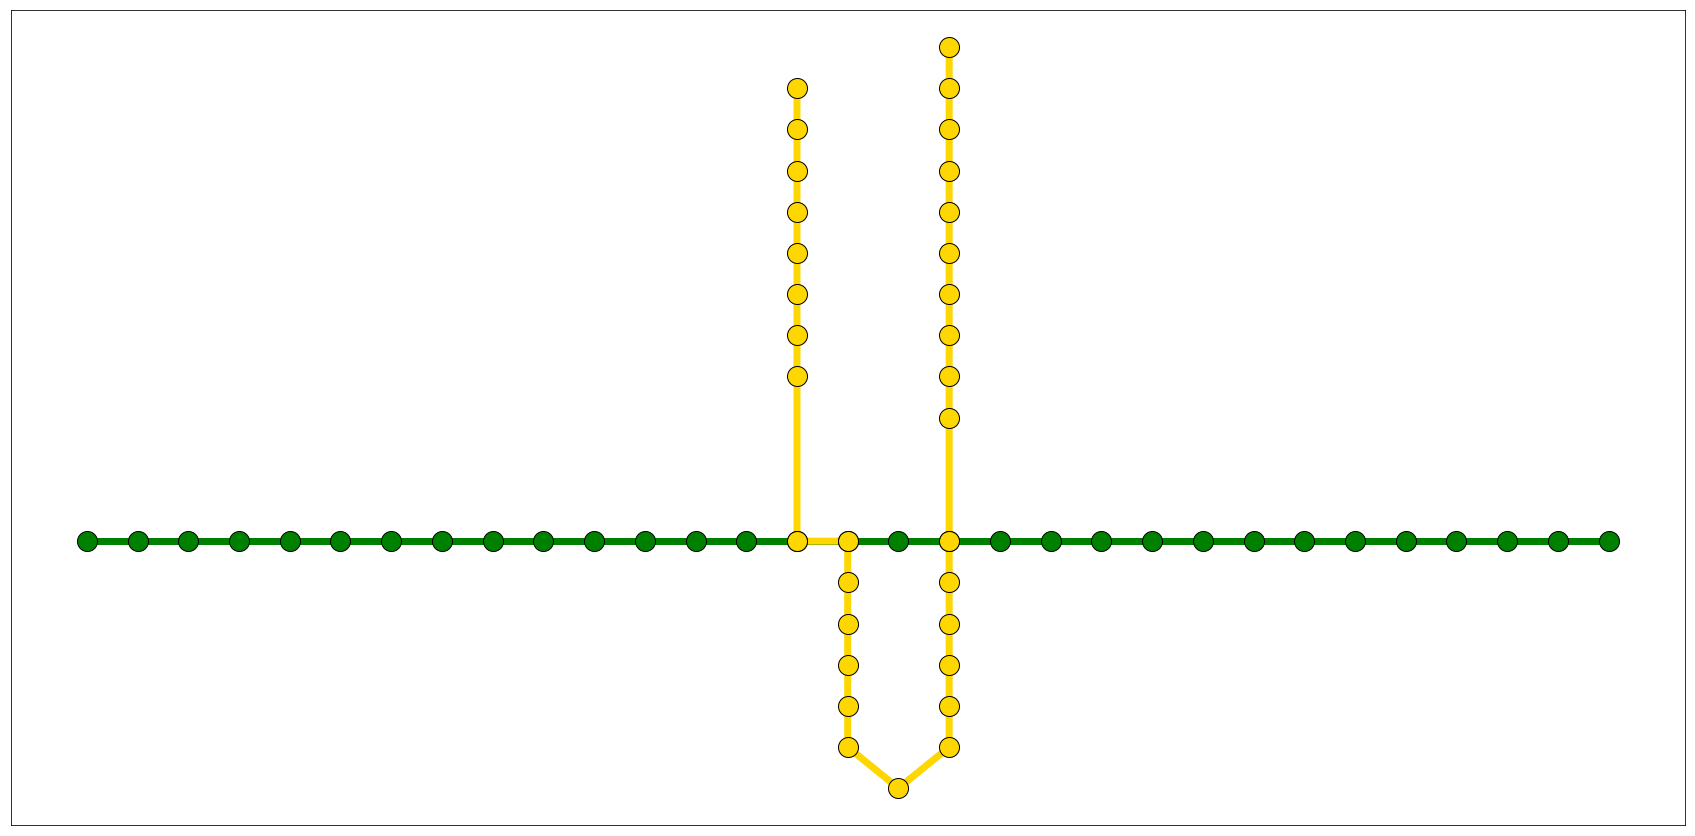

In [14]:
plt.figure(figsize=(30,15))
llw = 7
sms = 20
plt.plot(EW_posx,EW_posy,color='g',lw=llw)
plt.plot(NS_posx,NS_posy,color='gold',lw=llw)
plt.plot(EW_posx,EW_posy,'o',color='g',markersize=sms,markeredgecolor='k')
plt.plot(NS_posx,NS_posy,'o',color='gold',markersize=sms,markeredgecolor='k')
plt.xticks([])
plt.yticks([])

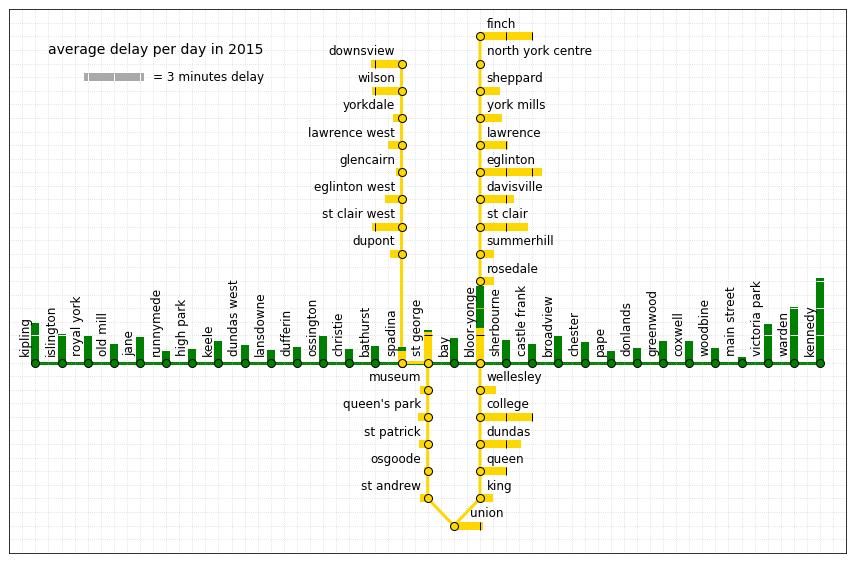

In [16]:
elw = 8
llw = 3
galph = 1
yalph = 1
max_delay = np.max(np.concatenate((yus_delays,bd_delays)))
min_size = 8
edge = 1
fs=12
scalesize = 8
line_interval = EW_sep
plt.figure(figsize=(15,10))
ax = plt.subplot(111)
ax.grid(ls =':',alpha=0.5)

plt.plot(EW_posx,EW_posy,color='g',lw=llw,zorder=1)
plt.plot(NS_posx,NS_posy,color='gold',lw=llw,zorder=2)

bd_scaleddelays = bd_delays/365./1.5

yus_scaleddelays = yus_delays/365./1.5

# Do Interchanges First

# Spadina
station = 'spadina'
plt.text(EW_posx[bd.index(station)]-0.63*EW_sep,EW_posy[bd.index(station)]+0.25*EW_sep,station,rotation=90,
         fontsize=fs,horizontalalignment='left',verticalalignment='bottom',zorder=5)
if yus_scaleddelays[yus.index(station)] > bd_scaleddelays[bd.index(station)]:
    plt.errorbar(EW_posx[bd.index(station)],EW_posy[bd.index(station)],yerr = np.array([[0,yus_scaleddelays[yus.index(station)]]]).T,
                     fmt='o',markeredgecolor='k',markeredgewidth=edge,markersize = min_size,color='gold',
                     elinewidth=elw,alpha=yalph,zorder=3)  
    plt.errorbar(EW_posx[bd.index(station)],EW_posy[bd.index(station)],yerr = np.array([[0,bd_scaleddelays[bd.index(station)]]]).T,
                     fmt='o',markeredgecolor='k',markeredgewidth=edge,markersize = min_size,color='g',
                     elinewidth=elw,alpha=galph,zorder=4)  
    totlines_bottom = np.floor(bd_scaleddelays[bd.index(station)])
    totlines_top = np.floor(yus_scaleddelays[yus.index(station)])
    for i in np.arange(line_interval,totlines_bottom+0.5*line_interval,line_interval):
        plt.plot(EW_posx[bd.index(station)],EW_posy[bd.index(station)]+i,'_',color='w',markersize=scalesize,zorder=5)
    for i in np.arange(totlines_bottom+line_interval,totlines_top+0.5*line_interval,line_interval):
        plt.plot(EW_posx[bd.index(station)],EW_posy[bd.index(station)]+i,'_',color='k',markersize=scalesize,zorder=5)
elif yus_scaleddelays[yus.index(station)] <= bd_scaleddelays[bd.index(station)]:
    plt.errorbar(EW_posx[bd.index(station)],EW_posy[bd.index(station)],yerr = np.array([[0,bd_scaleddelays[bd.index(station)]]]).T,
                     fmt='o',markeredgecolor='k',markeredgewidth=edge,markersize = min_size,color='g',
                     elinewidth=elw,alpha=galph,zorder=3)
    plt.errorbar(EW_posx[bd.index(station)],EW_posy[bd.index(station)],yerr = np.array([[0,yus_scaleddelays[yus.index(station)]]]).T,
                     fmt='o',markeredgecolor='k',markeredgewidth=edge,markersize = min_size,color='gold',
                     elinewidth=elw,alpha=yalph,zorder=4)
    totlines_bottom = np.floor(yus_scaleddelays[yus.index(station)])
    totlines_top = np.floor(bd_scaleddelays[bd.index(station)])
    for i in np.arange(line_interval,totlines_bottom+0.5*line_interval,line_interval):
        plt.plot(EW_posx[bd.index(station)],EW_posy[bd.index(station)]+i,'_',color='k',markersize=scalesize,zorder=5)
    for i in np.arange(totlines_bottom+line_interval,totlines_top+0.5*line_interval,line_interval):
        plt.plot(EW_posx[bd.index(station)],EW_posy[bd.index(station)]+i,'_',color='w',markersize=scalesize,zorder=5)
    
    
#St George
station = 'st george'
plt.text(EW_posx[bd.index(station)]-0.63*EW_sep,EW_posy[bd.index(station)]+0.25*EW_sep,station,rotation=90,
         fontsize=fs,horizontalalignment='left',verticalalignment='bottom',zorder=5)
if yus_scaleddelays[yus.index(station)] > bd_scaleddelays[bd.index(station)]:
    plt.errorbar(EW_posx[bd.index(station)],EW_posy[bd.index(station)],yerr = np.array([[0,yus_scaleddelays[yus.index(station)]]]).T,
                     fmt='o',markeredgecolor='k',markeredgewidth=edge,markersize = min_size,color='gold',
                     elinewidth=elw,alpha=yalph,zorder=3)  
    plt.errorbar(EW_posx[bd.index(station)],EW_posy[bd.index(station)],yerr = np.array([[0,bd_scaleddelays[bd.index(station)]]]).T,
                     fmt='o',markeredgecolor='k',markeredgewidth=edge,markersize = min_size,color='g',
                     elinewidth=elw,alpha=galph,zorder=4) 
    totlines_bottom = np.floor(bd_scaleddelays[bd.index(station)])
    totlines_top = np.floor(yus_scaleddelays[yus.index(station)])
    for i in np.arange(line_interval,totlines_bottom+0.5*line_interval,line_interval):
        plt.plot(EW_posx[bd.index(station)],EW_posy[bd.index(station)]+i,'_',color='w',markersize=scalesize,zorder=5)
    for i in np.arange(totlines_bottom+line_interval,totlines_top+0.5*line_interval,line_interval):
        plt.plot(EW_posx[bd.index(station)],EW_posy[bd.index(station)]+i,'_',color='k',markersize=scalesize,zorder=5)
        
elif yus_scaleddelays[yus.index(station)] <= bd_scaleddelays[bd.index(station)]:
    plt.errorbar(EW_posx[bd.index(station)],EW_posy[bd.index(station)],yerr = np.array([[0,bd_scaleddelays[bd.index(station)]]]).T,
                     fmt='o',markeredgecolor='k',markeredgewidth=edge,markersize = min_size,color='g',
                     elinewidth=elw,alpha=galph,zorder=3)
    plt.errorbar(EW_posx[bd.index(station)],EW_posy[bd.index(station)],yerr = np.array([[0,yus_scaleddelays[yus.index(station)]]]).T,
                     fmt='o',markeredgecolor='k',markeredgewidth=edge,markersize = min_size,color='gold',
                     elinewidth=elw,alpha=yalph,zorder=4) 
    totlines_bottom = np.floor(yus_scaleddelays[yus.index(station)])
    totlines_top = np.floor(bd_scaleddelays[bd.index(station)])
    for i in np.arange(line_interval,totlines_bottom+0.5*line_interval,line_interval):
        plt.plot(EW_posx[bd.index(station)],EW_posy[bd.index(station)]+i,'_',color='k',markersize=scalesize,zorder=5)
    for i in np.arange(totlines_bottom+line_interval,totlines_top+0.5*line_interval,line_interval):
        plt.plot(EW_posx[bd.index(station)],EW_posy[bd.index(station)]+i,'_',color='w',markersize=scalesize,zorder=5)

plt.text(EW_posx[bd.index('yonge')]-0.63*EW_sep,EW_posy[bd.index('yonge')]+0.25*EW_sep,'bloor-yonge',rotation=90,
         fontsize=fs,horizontalalignment='left',verticalalignment='bottom',zorder=5)    
if yus_scaleddelays[yus.index('bloor')] > bd_scaleddelays[bd.index('yonge')]:
    plt.errorbar(EW_posx[bd.index('yonge')],EW_posy[bd.index('yonge')],yerr = np.array([[0,yus_scaleddelays[yus.index('bloor')]]]).T,
                     fmt='o',markeredgecolor='k',markeredgewidth=edge,markersize = min_size,color='gold',
                     elinewidth=elw,alpha=yalph,zorder=3)  
    plt.errorbar(EW_posx[bd.index('yonge')],EW_posy[bd.index('yonge')],yerr = np.array([[0,bd_scaleddelays[bd.index('yonge')]]]).T,
                     fmt='o',markeredgecolor='k',markeredgewidth=edge,markersize = min_size,color='g',
                     elinewidth=elw,alpha=galph,zorder=4) 
    totlines_bottom = np.floor(bd_scaleddelays[bd.index('yonge')])
    totlines_top = np.floor(yus_scaleddelays[yus.index('bloor')])
    for i in np.arange(line_interval,totlines_bottom+0.5*line_interval,line_interval):
        plt.plot(EW_posx[bd.index('yonge')],EW_posy[bd.index('yonge')]+i,'_',color='w',markersize=scalesize,zorder=5)
    for i in np.arange(totlines_bottom+line_interval,totlines_top+0.5*line_interval,line_interval):
        plt.plot(EW_posx[bd.index('yonge')],EW_posy[bd.index('yonge')]+i,'_',color='k',markersize=scalesize,zorder=5)
if yus_scaleddelays[yus.index('bloor')] <= bd_scaleddelays[bd.index('yonge')]:
    plt.errorbar(EW_posx[bd.index('yonge')],EW_posy[bd.index('yonge')],yerr = np.array([[0,bd_scaleddelays[bd.index('yonge')]]]).T,
                     fmt='o',markeredgecolor='k',markeredgewidth=edge,markersize = min_size,color='g',
                     elinewidth=elw,alpha=galph,zorder=3)
    plt.errorbar(EW_posx[bd.index('yonge')],EW_posy[bd.index('yonge')],yerr = np.array([[0,yus_scaleddelays[yus.index('bloor')]]]).T,
                     fmt='o',markeredgecolor='k',markeredgewidth=edge,markersize = min_size,color='gold',
                     elinewidth=elw,alpha=yalph,zorder=4) 
    totlines_bottom = np.floor(yus_scaleddelays[yus.index('bloor')])
    totlines_top = np.floor(bd_scaleddelays[bd.index('yonge')])
    for i in np.arange(line_interval,totlines_bottom+0.5*line_interval,line_interval):
        plt.plot(EW_posx[bd.index('yonge')],EW_posy[bd.index('yonge')]+i,'_',color='k',markersize=scalesize,zorder=5)
    for i in np.arange(totlines_bottom+line_interval,totlines_top+0.5*line_interval,line_interval):
        plt.plot(EW_posx[bd.index('yonge')],EW_posy[bd.index('yonge')]+i,'_',color='y',markersize=scalesize,zorder=5)

for station in range(len(bd_scaleddelays)):
    if bd[station] not in interchange:
        plt.errorbar(EW_posx[station],EW_posy[station],yerr = np.array([[0,bd_scaleddelays[station]]]).T,
                     fmt='o',markeredgecolor='k',markeredgewidth=edge,markersize = min_size,color='g',
                     elinewidth=elw,alpha=galph,zorder=3)  
        plt.text(EW_posx[station]-0.63*EW_sep,EW_posy[station]+0.25*EW_sep,bd[station],rotation=90,fontsize=fs,
                 horizontalalignment='left',verticalalignment='bottom',zorder=5)
        totlines = np.floor(bd_scaleddelays[station])
        for i in np.arange(line_interval,totlines+0.5*line_interval,line_interval):
            plt.plot(EW_posx[station],EW_posy[station]+i,'_',color='w',markersize=scalesize,zorder=5)
    

for station in range(len(yus_scaleddelays)):
    if yus[station] not in interchange:
        if station < turn:
            plt.errorbar(NS_posx[station],NS_posy[station],xerr = np.array([[yus_scaleddelays[station],0]]).T,
                         fmt='o',markeredgecolor='k',markeredgewidth=edge,markersize = min_size,color='gold',
                         elinewidth=elw,alpha=yalph,zorder=4)
            plt.text(NS_posx[station]-0.25*NS_sep,NS_posy[station]+0.2*NS_sep,yus[station],fontsize=fs,
                     horizontalalignment='right',verticalalignment='bottom',zorder=5)
            totlines = np.floor(yus_scaleddelays[station])
            for i in np.arange(line_interval,totlines+0.2*line_interval,line_interval):
                plt.plot(NS_posx[station]-i,NS_posy[station],'|',color='k',markersize=scalesize,zorder=5)
        if station == turn:
            plt.errorbar(NS_posx[station],NS_posy[station],xerr = np.array([[0,yus_scaleddelays[station]]]).T,
                         fmt='o',markeredgecolor='k',markeredgewidth=edge,markersize = min_size,color='gold',
                         elinewidth=elw,alpha=yalph,zorder=4)
            plt.text(NS_posx[station]+0.6*NS_sep,NS_posy[station]+0.2*NS_sep,yus[station],fontsize=fs,
                     horizontalalignment='left',verticalalignment='bottom',zorder=5)
            totlines = np.floor(yus_scaleddelays[station])
            for i in np.arange(line_interval,totlines+0.2*line_interval,line_interval):
                plt.plot(NS_posx[station]+i,NS_posy[station],'|',color='k',markersize=scalesize,zorder=5)
        if station>turn:
            plt.errorbar(NS_posx[station],NS_posy[station],xerr = np.array([[0,yus_scaleddelays[station]]]).T,
                         fmt='o',markeredgecolor='k',markeredgewidth=edge,markersize = min_size,color='gold',
                         elinewidth=elw,alpha=yalph,zorder=4)
            plt.text(NS_posx[station]+0.25*NS_sep,NS_posy[station]+0.2*NS_sep,yus[station],fontsize=fs,
                     horizontalalignment='left',verticalalignment='bottom',zorder=5)
            totlines = np.floor(yus_scaleddelays[station])
            for i in np.arange(line_interval,totlines+0.2*line_interval,line_interval):
                plt.plot(NS_posx[station]+i,NS_posy[station],'|',color='k',markersize=scalesize,zorder=5)
xtickpos = np.arange(np.min(EW_posx)-EW_sep,np.max(EW_posx)+EW_sep,EW_sep/2.)
plt.xticks(xtickpos)
plt.xlim(np.min(EW_posx)-EW_sep,np.max(EW_posx)+EW_sep)
ax.set_xticklabels(['']*len(xtickpos))
ytickpos = np.arange(np.min(NS_posy)-NS_sep,np.max(NS_posy)+NS_sep,NS_sep/2.)
plt.yticks(ytickpos)
ax.set_yticklabels(['']*len(ytickpos))
y=plt.ylim(np.min(NS_posy)-NS_sep,np.max(NS_posy)+NS_sep)
plt.tick_params(which='major',length=0)
plt.text(np.min(EW_posx)+0.5*EW_sep,np.max(NS_posy)-0.5*NS_sep,'average delay per day in 2015',
         fontsize=14,horizontalalignment='left',verticalalignment='center')
plt.plot([np.min(EW_posx)+2*EW_sep,np.min(EW_posx)+4*EW_sep],[np.max(NS_posy)-1.5*NS_sep,np.max(NS_posy)-1.5*NS_sep],lw=elw,color='darkgray')
plt.plot([np.min(EW_posx)+2*EW_sep,np.min(EW_posx)+3*EW_sep,np.min(EW_posx)+4*EW_sep],[np.max(NS_posy)-1.5*NS_sep,np.max(NS_posy)-1.5*NS_sep,np.max(NS_posy)-1.5*NS_sep],'|',color='w',markersize=8)
plt.text(np.min(EW_posx)+4.5*EW_sep,np.max(NS_posy)-1.5*NS_sep,'= 3 minutes delay',fontsize=12,horizontalalignment='left',verticalalignment='center')
plt.savefig('figs/Price-Jones_plot.pdf')

## Summary: 

Anita and I chose this data set of ridership and subway delay information after its release was announced on June 12. Since we both take transit regularly and experience delays, this was a interesting data set for us to explore. This is the first time the TTC has publicly released information about delays. (https://www.thestar.com/news/gta/2017/06/12/whats-keeping-that-train-the-ttc-has-69000-reasons-why.html). Each delay-related entry contained a lot of detail: date, time, location, and description of the delay, as well as the length of the delay. I wanted to display this information spatially, since that was to me the most logical way to think about the distribution of delay time across subway stations. I spent some time setting up a map of the two major subway lines, neglecting the Sheppard and Scarborough Rapid Transit lines. I used the conventional colours shown on the TTC maps to plot these two lines, as these colours can easily be distinguished even when made monochromatic.  I also filtered the data for delays occurring in 2015, since this was the year for which I had the most recent ridership data. My initial plan had been to display at each station a pie chart showing the relative contributions of different types of delays. There are about 130 different delay codes used in the data, but I had sorted these into the following broad categories: delays attributable to TTC employees, delays attributable to TTC patrons or emergency services, delays due to train signals, delays due to the trains, delays due to the tracks, delays due to weather and miscellaneous mechanical delays. However, the information content in such a plot would be incredibly dense. I realized that as a patron I am not interested in how many of each delay I might experience, but rather how long a delay lasts. For example, the report of an injured or ill passenger on board a train is the 9th most frequent report, but when the reports are weighted by the amount of time they delayed a train, it jumps up to the second slot. I settled on showing the average lengths of delays per day in 2015, with a bar extending from station position. I added a background grid to facilitate comparison of the Bloor-Danforth line, where bars are vertical, with the Yonge-University-Spadina line, where bars are horizontal. Interchange stations were recorded separately for each line, and appear as stacked vertical bars. If I had more time, I might incorporate ridership information in the size of station dots, making them sufficiently transparent that delay information is still clear. However, the complication with comparing areas would need to be carefully handled.